In [7]:
import csv
import numpy as np

data_dict = {}
# Initialize an empty dictionary
name = { 0:'s1.1', 1:'s1.2', 2:'s2.1', 3:'s2.2', 4:'s2.3', 5:'s3.1', 6:'s3.2',
              7:'b1.1', 8:'b2.1', 9:'b2.2', 10:'b2.3', 11:'b3.1', 12:'b3.2', 13:'naive', 14:'sequence', 15:'binning', 16:'gt', 17:'pseudo_gt' }

with open('../data/sst5/results.csv', 'r') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        # Convert each row to a numpy array and store it in the dictionary
        data_dict[name[i]] = np.array(row, dtype=float)

data_dict


{'s1.1': array([0.28552036, 0.39864253, 0.40723982, 0.4081448 , 0.41221719,
        0.42126697, 0.42760181, 0.42986425, 0.44117647, 0.43846154]),
 's1.2': array([0.28552036, 0.41176471, 0.39140271, 0.40180995, 0.41719457,
        0.42760181, 0.43348416, 0.42714932, 0.42941176, 0.44298643]),
 's2.1': array([0.28552036, 0.40497738, 0.41674208, 0.40090498, 0.38778281,
        0.38190045, 0.38144796, 0.3800905 , 0.38325792, 0.38461538]),
 's2.2': array([0.28552036, 0.28054299, 0.30542986, 0.32352941, 0.31493213,
        0.31085973, 0.31040724, 0.31040724, 0.30859729, 0.30226244]),
 's2.3': array([0.28552036, 0.40452489, 0.4158371 , 0.40904977, 0.39819005,
        0.39954751, 0.41131222, 0.40995475, 0.41402715, 0.41221719]),
 's3.1': array([0.28552036, 0.19954751, 0.24615385, 0.24886878, 0.24208145,
        0.23665158, 0.24660633, 0.23438914, 0.239819  , 0.24660633]),
 's3.2': array([0.28552036, 0.40045249, 0.40226244, 0.40361991, 0.39909502,
        0.4199095 , 0.42443439, 0.4239819 , 0.42

In [8]:
import matplotlib.pyplot as plt

# function for plotting
def plot(plot_list):
    x = [n for n in range(10)]
    for name in plot_list:
        plt.plot(x, data_dict[name], label=name)

    plt.legend()

### 0. General Results

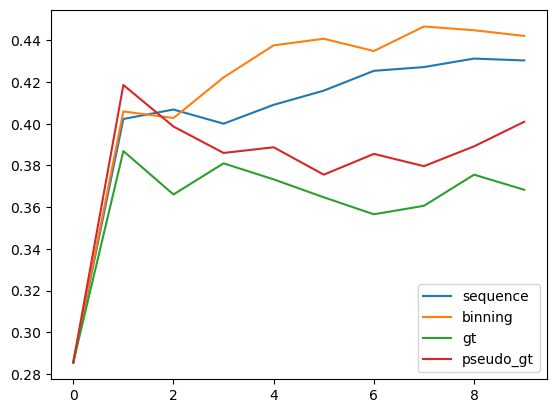

In [12]:
plot_list = ['sequence', 'binning', 'gt', 'pseudo_gt']
plot(plot_list)

benchmark

great 70% good 15% okay 7% bad 5% teriible 3%

### 1. How well do LLMs understand numbers?

s1.1 Completely change sequence of numbers, retaining label sequence

great 15% good 5% okay 3% bad 70% terrible 7%

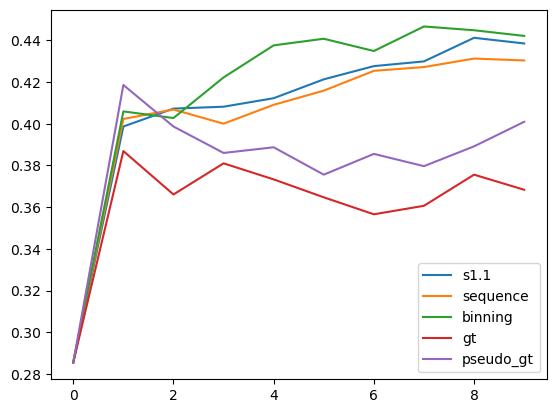

In [14]:
plot_list = ['s1.1', 'sequence', 'binning', 'gt', 'pseudo_gt']
plot(plot_list)

performs better than sequence (???) 결국 숫자는 안 중요한 것인가? but is worse than binning. 

s1.2 Just delete numbers (!)

great good okay bad terrible

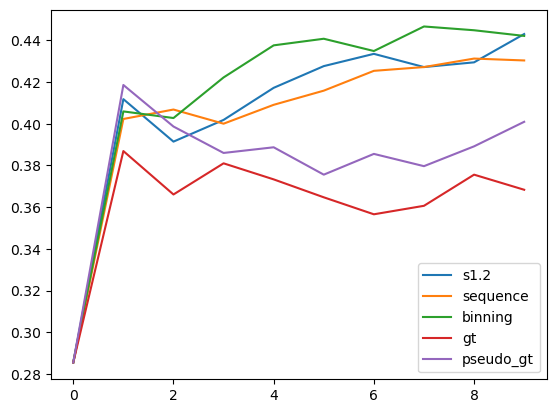

In [13]:
plot_list = ['s1.2','sequence', 'binning', 'gt', 'pseudo_gt']
plot(plot_list)

performs better than sequence...? 결국 숫자는 필요없다 but is worse than binning.

b1.1 Completely change sequence of natural language. 

great is not likely, good could be likely, okay is not very likely, bad is very likely, terrible is likely

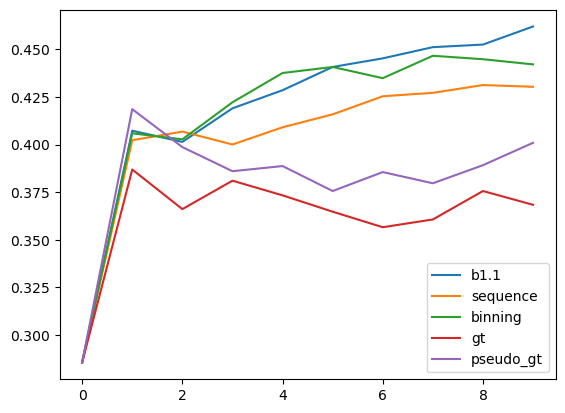

In [15]:
plot_list = ['b1.1','sequence', 'binning', 'gt', 'pseudo_gt']
plot(plot_list)

complete nonsense - outperforms binning. is the best (...) 완전히 바꿔도 오히려 성능이 향상된다 (..?)

### 2. How important is the first label?

s2.1 only leave the first (most likeable) one

great 70%

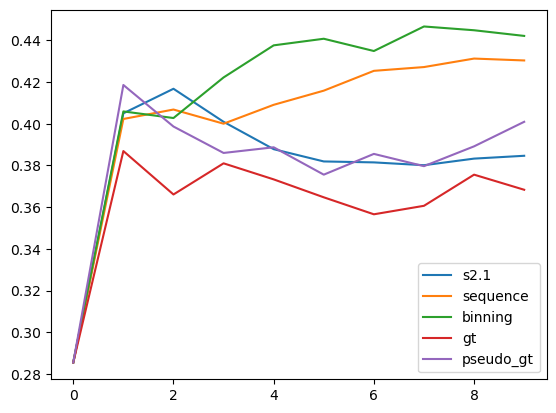

In [16]:
plot_list = ['s2.1','sequence', 'binning', 'gt', 'pseudo_gt']
plot(plot_list)

flops, similar to pesudo-gt. so other label information / distribution information does matter. 

s2.2 delete the first one. 

good 15% okay 7% bad 5% terrible 3%

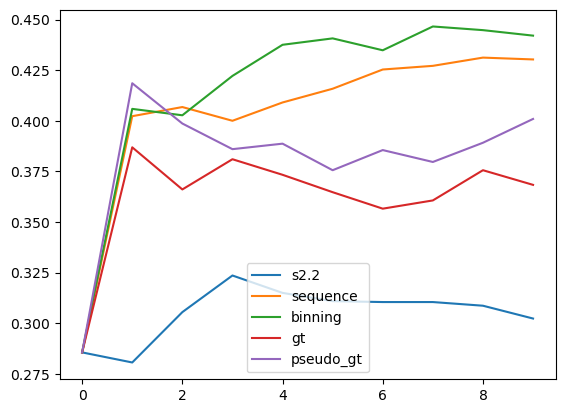

In [17]:
plot_list = ['s2.2','sequence', 'binning', 'gt', 'pseudo_gt']
plot(plot_list)

absolute trash. since deleting the first label equals to pretending the second label is the first label, makes sense. 

2.3 repeat the most likeable label 5 times. 

good 70% good 70% good 70% good 70% good 70%

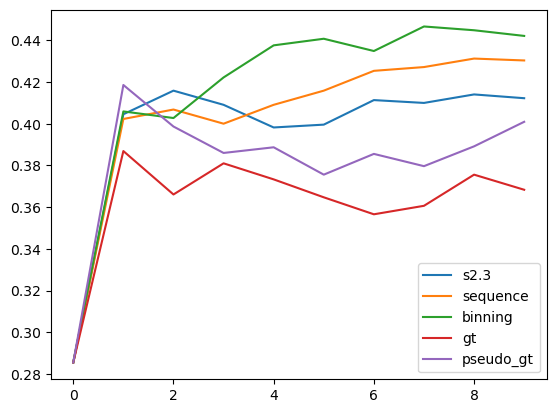

In [18]:
plot_list = ['s2.3','sequence', 'binning', 'gt', 'pseudo_gt']
plot(plot_list)

still is bad, but better than s2.1... so gaslighting on the first label does improve performance!

b2.1 only leave the most likeable one. 

great is very likely

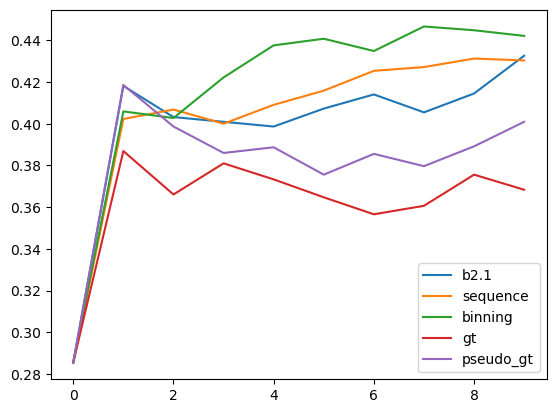

In [19]:
plot_list = ['b2.1','sequence', 'binning', 'gt', 'pseudo_gt']
plot(plot_list)

shows almost the same amount of decrease as s2.1 other label information does matter. 

b2.2 delete the first one. 

good is likely, okay could be likely, bad is not likely, terrible is not very likely

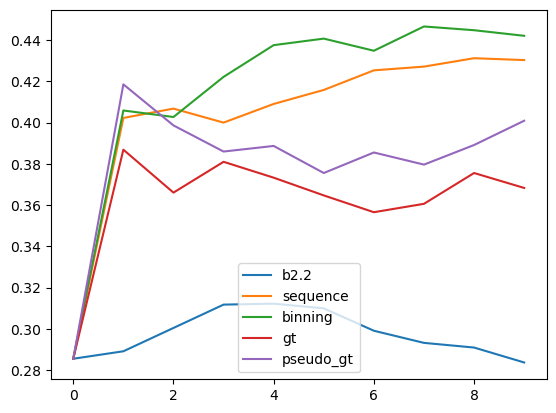

In [20]:
plot_list = ['b2.2','sequence', 'binning', 'gt', 'pseudo_gt']
plot(plot_list)

also flops like sequence.

b2.3 repeat the most likeable label 5 times. 

good is very likely, good is very likely, good is very likely, good is very likely, good is very likely

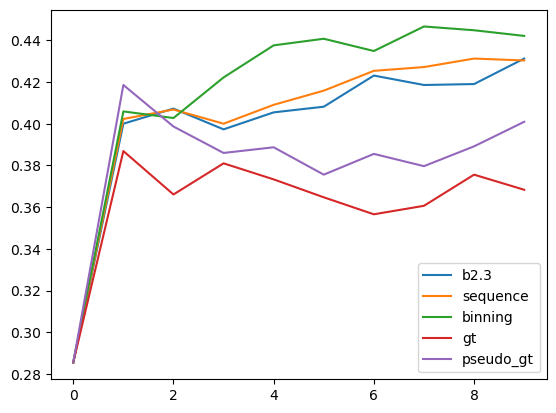

In [21]:
plot_list = ['b2.3','sequence', 'binning', 'gt', 'pseudo_gt']
plot(plot_list)

like sequence, shows almost the same amount of decrease. gaslighting still is effective. 

### 3. How well do LLMs recognize sequence?

s3.1 retaining the numberes, shuffle labels. 

bad 70% okay 15% good 7% great 5% terrible 3%

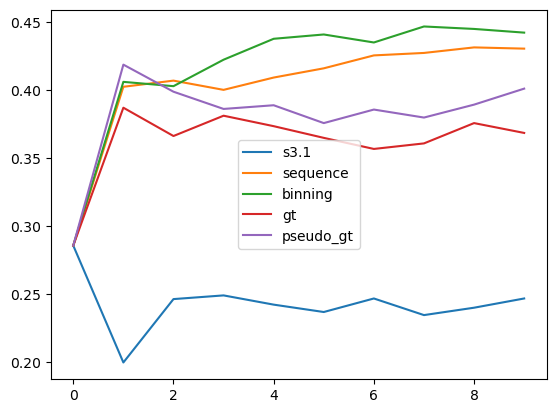

In [22]:
plot_list = ['s3.1','sequence', 'binning', 'gt', 'pseudo_gt']
plot(plot_list)

flops, probably because the first label was affected. 

s3.2 shuffle labels, except the first one. 

great 70% okay 15% good 7% terrible 5% bad 3%

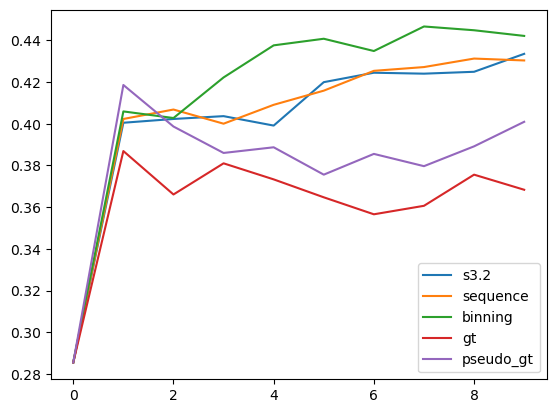

In [23]:
plot_list = ['s3.2','sequence', 'binning', 'gt', 'pseudo_gt']
plot(plot_list)

performs similar to sequence. so if labels are given and its distribution is lightly given, there are no notable performance difference in performance. 

b3.1 retaining the explanations, shuffle labels

good is very likely, okay is likely, bad could be likely, terrible is not likely, great is not very likely

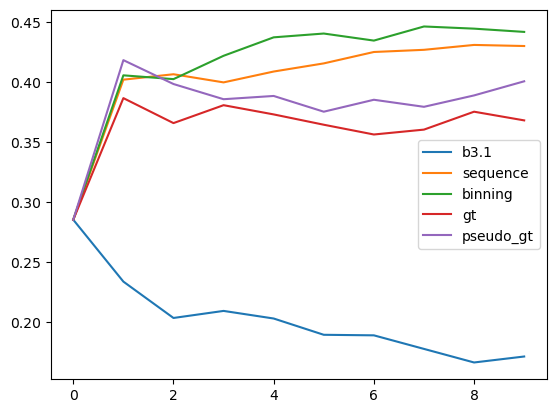

In [24]:
plot_list = ['b3.1','sequence', 'binning', 'gt', 'pseudo_gt']
plot(plot_list)

the worst. performs worse than random guessing. the loss of first label hits harder for natural language?

b3.2 shuffle labels, except the first one. 

great is very likely, okay is likely, bad could be likely, terrible is not likely, good is not very likely

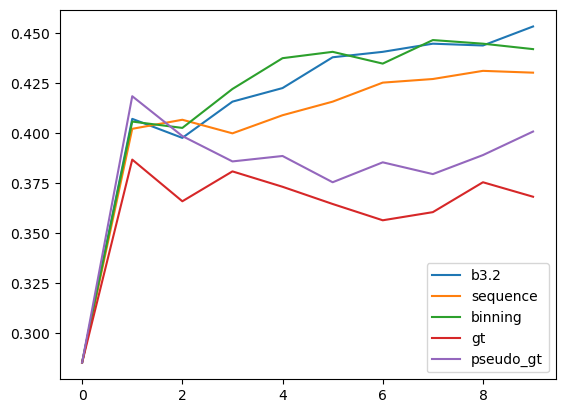

In [25]:
plot_list = ['b3.2','sequence', 'binning', 'gt', 'pseudo_gt']
plot(plot_list)

again, similar performance to binning. 맨 처음 label 에 대한 정보만 있으면 된다

### Conclusion

1. 첫번째 label 은 무조건 맞게 줘야 하고, 다른 label 에 대한 정보 역시 필요하다. 
2. 두번쨰 label 부터는 아무 순서나 줘도 된다. 
3. 설명에 있는 숫자나 explanation 역시 첫번째 포함 막 섞어도 성능이 오히려 향상된다 (..?)